In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [51]:
notas_ac07=pd.read_csv('https://github.com/danieltb3006/DM_Ibmec/raw/main/notas_alunos_Ibmec.csv', sep=';', encoding='ISO-8859-1')
notas_ac07

,Curso,Alunos,AP1,AP2,Ap3
0,Adm,Joao,4.5,5.0,6.0
1,Dir,Pedro,7.9,9.0,7.0
2,Eco,Ana Maria,2.0,3.0,5.0
3,RI,Paulo,10.0,8.8,9.0
4,Adm,Maria,3.0,7.0,9.0
5,Adm,Priscila,8.0,6.5,4.0
6,Adm,Manoel,5.0,8.0,9.5
7,Dir,João Paulo,1.0,3.0,5.0
8,Eco,Ana Paula,4.5,3.0,7.5
9,RI,Joana,7.0,8.0,8.0


In [28]:
notas_ac07.shape

(41, 5)

In [35]:
notas_ac07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Curso   41 non-null     object 
 1   Alunos  41 non-null     object 
 2   AP1     41 non-null     float64
 3   AP2     41 non-null     float64
 4   Ap3     41 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.7+ KB


* Q01) No arquivo CSV abaixo, verifique se existem "valores nulos" e, caso positivo, preencha com "0" (zero) (ISNULL e FILLNA)

In [37]:
notas_ac07.isnull().sum()

,0
Curso,0
Alunos,0
AP1,0
AP2,0
Ap3,0


* Q02)  crie uma nova coluna que calcule a média da turma, considerando os seguintes pesos para as avaliações:
>* AP1 - 35%
>* AP2 - 25%
>* AP3 - 40%

In [52]:
notas_ac07['Média'] = notas_ac07['AP1'] * 0.35 + notas_ac07['AP2'] * 0.25 + notas_ac07['Ap3'] * 0.4
notas_ac07.head()

,Curso,Alunos,AP1,AP2,Ap3,Média
0,Adm,Joao,4.5,5.0,6.0,5.225
1,Dir,Pedro,7.9,9.0,7.0,7.815
2,Eco,Ana Maria,2.0,3.0,5.0,3.450
3,RI,Paulo,10.0,8.8,9.0,9.300
4,Adm,Maria,3.0,7.0,9.0,6.400


In [53]:
notas_ac07.where(notas_ac07['Alunos']=='Joao Paulo').dropna()

,Curso,Alunos,AP1,AP2,Ap3,Média
29,Adm,Joao Paulo,5.0,8.0,6.0,6.15


* Q03) Insira uma coluna informando a situação final do aluno (aprovado, reprovado ou substitutiva):
>* Aprovado: media >= 6.5
>* Substitutiva: 4 <= media < 6.5
>* Reprovado: media < 4

In [54]:
for i in range (len(notas_ac07)):

  if (notas_ac07.loc[i,'Média'] >= 6.5):
    notas_ac07.loc[i,'Situacao'] = "Aprovado"

  elif (notas_ac07.loc[i,'Média'] >= 4.0):
    notas_ac07.loc[i,'Situacao'] = "Substitutiva"

  else:
    notas_ac07.loc[i,'Situacao'] = "Reprovado"

In [55]:
notas_ac07.where(notas_ac07['Alunos']=='Roberson').dropna()

,Curso,Alunos,AP1,AP2,Ap3,Média,Situacao
21,RI,Roberson,4.0,6.0,6.0,5.3,Substitutiva


In [56]:
notas_ac07.Situacao.value_counts()

,count
Situacao,
Substitutiva,20
Aprovado,19
Reprovado,2


* Q04) Escreva por extenso os nomes dos cursos (comando FOR + IF/ELSE + .loc[i,coluna])

In [57]:
for i in range (len(notas_ac07)):

  if (notas_ac07.loc[i,'Curso'] == "Adm"):
    notas_ac07.loc[i,'Curso'] = "Administração"

  elif (notas_ac07.loc[i,'Curso'] == "Dir"):
    notas_ac07.loc[i,'Curso'] = "Direito"

  elif (notas_ac07.loc[i,'Curso'] == "Eco"):
    notas_ac07.loc[i,'Curso'] = "Economia"

  else:
    notas_ac07.loc[i,'Curso'] = "Relações Internacionais"

In [60]:
notas_ac07.head(8)

,Curso,Alunos,AP1,AP2,Ap3,Média,Situacao
0,Administração,Joao,4.5,5.0,6.0,5.225,Substitutiva
1,Direito,Pedro,7.9,9.0,7.0,7.815,Aprovado
2,Economia,Ana Maria,2.0,3.0,5.0,3.450,Reprovado
3,Relações Internacionais,Paulo,10.0,8.8,9.0,9.300,Aprovado
4,Administração,Maria,3.0,7.0,9.0,6.400,Substitutiva
5,Administração,Priscila,8.0,6.5,4.0,6.025,Substitutiva
6,Administração,Manoel,5.0,8.0,9.5,7.550,Aprovado
7,Direito,João Paulo,1.0,3.0,5.0,3.100,Reprovado


In [74]:
#Apenas um exemplo de como utilizar a função REPLACE

notas_ac07['Situacao'][4]=notas_ac07['Situacao'][4].replace('Sub','Substitutiva')
notas_ac07

<ipython-input-74-22fdb503ea26>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  notas_ac07['Situacao'][4]=notas_ac07['Situacao'][4].replace('Sub','Substitutiva')
<ipython-input-74-22fdb503ea26>:3: SettingWithCopyWarning: 
A value is trying 

,Curso,Alunos,AP1,AP2,Ap3,Média,Situacao
0,Administração,Joao,4.5,5.0,6.0,5.225,Substitutiva
1,Direito,Pedro,7.9,9.0,7.0,7.815,Aprovado
2,Economia,Ana Maria,2.0,3.0,5.0,3.450,Reprovado
3,Relações Internacionais,Paulo,10.0,8.8,9.0,9.300,Aprovado
4,Administração,Maria,3.0,7.0,9.0,6.400,Substitutiva
5,Administração,Priscila,8.0,6.5,4.0,6.025,Substitutiva
6,Administração,Manoel,5.0,8.0,9.5,7.550,Aprovado
7,Direito,João Paulo,1.0,3.0,5.0,3.100,Reprovado
8,Economia,Ana Paula,4.5,3.0,7.5,5.325,Substitutiva
9,Relações Internacionais,Joana,7.0,8.0,8.0,7.650,Aprovado


In [12]:
notas_ac07.Curso.value_counts()

,count
Curso,
Administração,14
Economia,11
Relações Internacionais,10
Direito,6


* Q05) Monte as fórmulas (groupby) para responder as seguintes perguntas:
>* Média dos alunos por cursos
>* Menor nota AP1 dos alunos por cursos
>* Maior nota AP3 dos alunos por cursos  

In [64]:
media_cursos = notas_ac07.groupby('Curso')['Média'].mean().round(2)
media_cursos

,Média
Curso,
Administração,6.53
Direito,6.66
Economia,6.42
Relações Internacionais,6.76


In [65]:
min_AP1_cursos = notas_ac07.groupby('Curso')['AP1'].min()
min_AP1_cursos

,AP1
Curso,
Administração,1.0
Direito,1.0
Economia,2.0
Relações Internacionais,2.0


In [67]:
max_AP3_cursos = notas_ac07.groupby('Curso')['Ap3'].max()
max_AP3_cursos

,Ap3
Curso,
Administração,10.0
Direito,9.8
Economia,10.0
Relações Internacionais,9.5


In [72]:
notas_ac07.where(notas_ac07['Curso']=='Relações Internacionais').dropna().sort_values(by='Ap3', ascending=False).head()

,Curso,Alunos,AP1,AP2,Ap3,Média,Situacao
27,Relações Internacionais,Luiz Pedro,7.5,4.5,9.5,7.550,Aprovado
35,Relações Internacionais,Marcos,5.5,5.0,9.5,6.975,Aprovado
3,Relações Internacionais,Paulo,10.0,8.8,9.0,9.300,Aprovado
19,Relações Internacionais,Celina,2.0,7.0,9.0,6.050,Substitutiva
32,Relações Internacionais,Felipe,10.0,6.0,9.0,8.600,Aprovado


* Q06) Monte um "gráfico de pizza", com legenda e apresentando os valores com duas casas decimais, que mostre a distribuição percentual da Situação dos alunos

In [75]:
freq_situacao = notas_ac07.Situacao.value_counts()
freq_situacao

,count
Situacao,
Substitutiva,20
Aprovado,19
Reprovado,2


In [76]:
freq_situacao2 = notas_ac07.groupby('Situacao')['Ap3'].count()
freq_situacao2

,Ap3
Situacao,
Aprovado,19
Reprovado,2
Substitutiva,20


<Axes: title={'center': 'Situacao dos alunos'}, ylabel='count'>

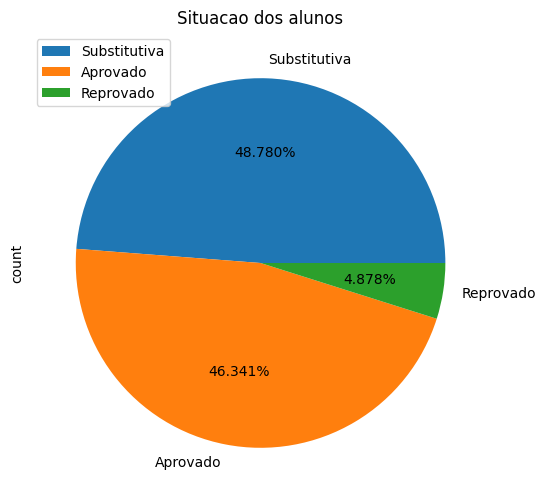

In [78]:
freq_situacao.plot.pie(title = "Situacao dos alunos",
                       legend=True,
                       autopct='%.3f%%',
                       figsize=(6, 6) )

<Axes: title={'center': 'Situacao dos alunos'}, ylabel='count'>

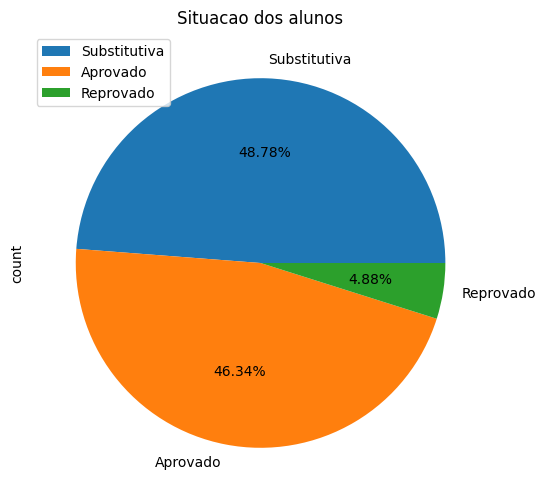

In [79]:
#Poderia obter o mesmo resultado sem criar a variável intermediária (freq_situacao)

notas_ac07.Situacao.value_counts().plot.pie(title = "Situacao dos alunos",
                                            legend=True,
                                            autopct='%.2f%%',
                                            figsize=(6, 6) )

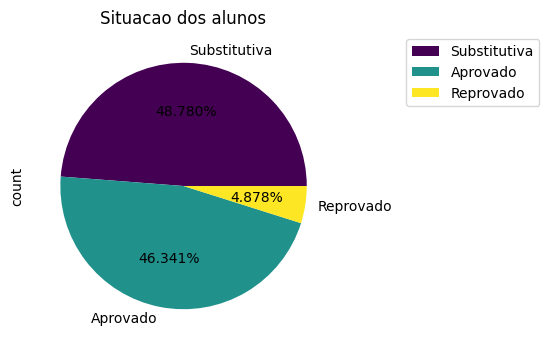

In [81]:
freq_situacao.plot.pie(title = "Situacao dos alunos",
                       legend=True,
                       autopct='%.3f%%',
                       figsize=(5, 4),
                       colormap='viridis')
plt.legend(bbox_to_anchor=(1.2, 1))


* Q07) Monte uma "Tabela Dinâmica" que apresente a média dos alunos, organizada por Situação e por Curso

In [82]:
curso_situacao_medias = notas_ac07.pivot_table(values=['Média'],index = ['Curso','Situacao'],aggfunc='mean')
curso_situacao_medias

Média
Curso                   Situacao              
Administração           Aprovado      7.922000
                        Substitutiva  5.749444
Direito                 Aprovado      7.646250
                        Reprovado     3.100000
                        Substitutiva  6.280000
Economia                Aprovado      8.430000
                        Reprovado     3.450000
                        Substitutiva  5.584167
Relações Internacionais Aprovado      7.820833
                        Substitutiva  5.168750

## **Como salvar esse DataFrame para um arquivo do Excel?**

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
notas_ac07.to_excel('/content/drive/MyDrive/2024_02 Prog Python/ProgPython 8016 ADM/teste.xlsx')